In [37]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load result

In [38]:
def load_loss(path): 
    files = glob.glob(path)
    dfs_split = []
    for file in files: 
        df = pd.read_csv(file, index_col=[0,1], header=[0,1])
        dfs_split.append(df)
    
    return dfs_split

In [39]:
trial_name = 'trial38'
path = '../results/gefcom2014-solar/'+trial_name+'/dfs_loss_valid/*.csv'
dfs_loss_split_valid = load_loss(path)

## Competition benchmark

In [40]:
loss_mean_valid = [df.mean().mean() for df in dfs_loss_split_valid]

In [41]:
df_scores = pd.read_excel('../data/gefcom2014/gefcom2014-scores.xlsx', index_col=0, header=0, sheet_name='Solar')
df_scores.loc['Solar trial',:] = loss_mean_valid
df_scores.loc[:,'Overall'] = df_scores.iloc[:, 4:].mean(axis=1)

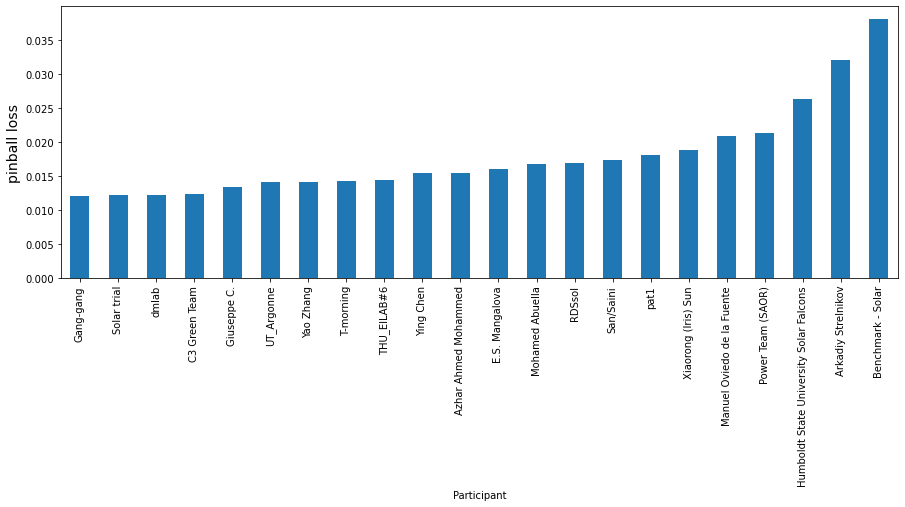

In [42]:
ax = df_scores['Overall'].sort_values().plot.bar(figsize=(15,5))
ax.set_ylabel('pinball loss', fontsize=14);

/anaconda3/envs/power-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


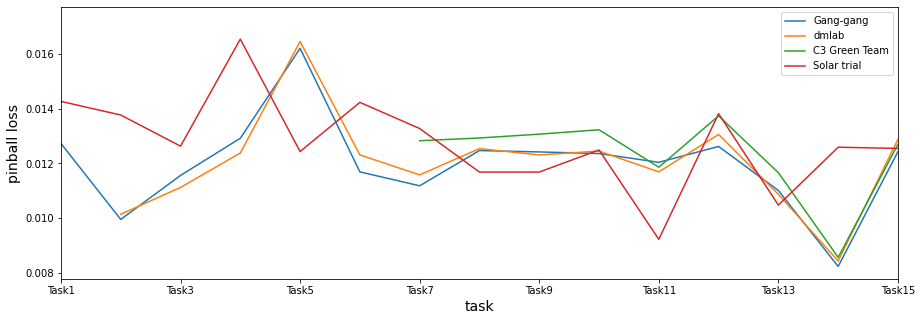

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
df_scores.loc['Gang-gang',:][:-1].plot(ax=ax)
df_scores.loc['dmlab',:][:-1].plot(ax=ax)
df_scores.loc['C3 Green Team',:][:-1].plot(ax=ax)
ylim = ax.get_ylim()
#df_area = pd.DataFrame(data=np.repeat(ylim[1], 4), index=df_scores.columns[:4], columns=['Test period'])
#df_area.plot.area(ax=ax, color='grey', alpha=0.3)
df_scores.loc['Solar trial',:][:-1].plot(ax=ax)
#ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('task', fontsize=14)
ax.set_ylabel('pinball loss', fontsize=14)
ax.legend()

In [67]:
set_xticks

NameError: name 'set_xticks' is not defined

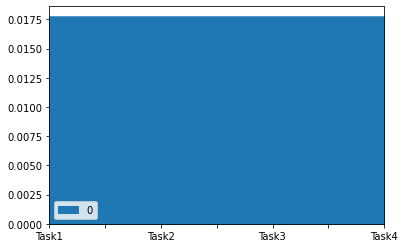

In [56]:
df_area.T.plot.area()

## Pinball loss as function of quantiles

In [45]:
def plot_pinball_quantile(loss_split):
    loss_split_means = []
    for loss_farm in loss_split:
        loss_split_mean = [np.mean(loss, axis=0) for loss in loss_farm]
        loss_split_means.append(loss_split_mean) 

    fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
    ax = ax.flatten()
    for i, loss_split_farm in enumerate(loss_split_means):
        ax[i].set_title('task: {0}'.format(i+1))
        for loss_split_quantile in loss_split_farm:
            ax[i].plot(range(1,100), loss_split_quantile)

In [46]:
plot_pinball_quantile(loss_splits[-1])

NameError: name 'loss_splits' is not defined

In [ ]:
plot_pinball_quantile(loss_splits[-1])

In [ ]:
plot_pinball_quantile(loss_splits[4])